<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Decision_Tree_(Fraud_check).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report 
from sklearn import preprocessing 

In [12]:
Fraud_check= pd.read_csv("Fraud_check.csv")

In [13]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [14]:
Fraud_check.loc[Fraud_check["Taxable.Income"] <= 30000,"Taxable_Income"]="Good"
Fraud_check.loc[Fraud_check["Taxable.Income"] > 30001,"Taxable_Income"]="Risky"
#Fraud_check.loc[Fraud_check["Taxable.Income"]!="Good","Taxable_Income"]="Risky"


In [15]:
Fraud_check.head(100)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
95,YES,Single,41395,121498,28,YES,Risky
96,NO,Single,22258,63622,17,NO,Good
97,YES,Divorced,79583,37849,19,YES,Risky
98,YES,Married,22187,77053,18,YES,Good


In [16]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check["Undergrad"] = label_encoder.fit_transform(Fraud_check["Undergrad"])
Fraud_check["Marital.Status"] = label_encoder.fit_transform(Fraud_check["Marital.Status"])
Fraud_check["Urban"] = label_encoder.fit_transform(Fraud_check["Urban"])
Fraud_check["Taxable_Income"] = label_encoder.fit_transform(Fraud_check["Taxable_Income"])

In [17]:
Fraud_check.drop(['City.Population'],axis=1,inplace=True)
Fraud_check.drop(['Taxable.Income'],axis=1,inplace=True)

In [18]:
Fraud_check["Taxable_Income"].unique()

array([1, 0])

In [19]:
Fraud_check

,Undergrad,Marital.Status,Work.Experience,Urban,Taxable_Income
0,0,2,10,1,1
1,1,0,18,1,1
2,0,1,30,1,1
3,1,2,15,1,1
4,0,1,28,0,1
...,...,...,...,...,...
595,1,0,7,1,1
596,1,0,2,1,1
597,0,0,0,1,1
598,1,1,17,0,1


In [20]:
x = Fraud_check.iloc[:,0:4]
y = Fraud_check["Taxable_Income"]

In [21]:
x

,Undergrad,Marital.Status,Work.Experience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [22]:
len(y)

600

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable_Income, Length: 600, dtype: int64

In [24]:
colnames=list(Fraud_check.columns)

In [25]:
colnames

['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban', 'Taxable_Income']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [37]:
model=DecisionTreeClassifier(criterion="gini")
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

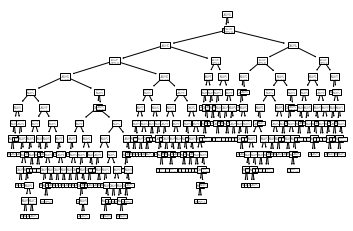

In [38]:
tree.plot_tree(model);

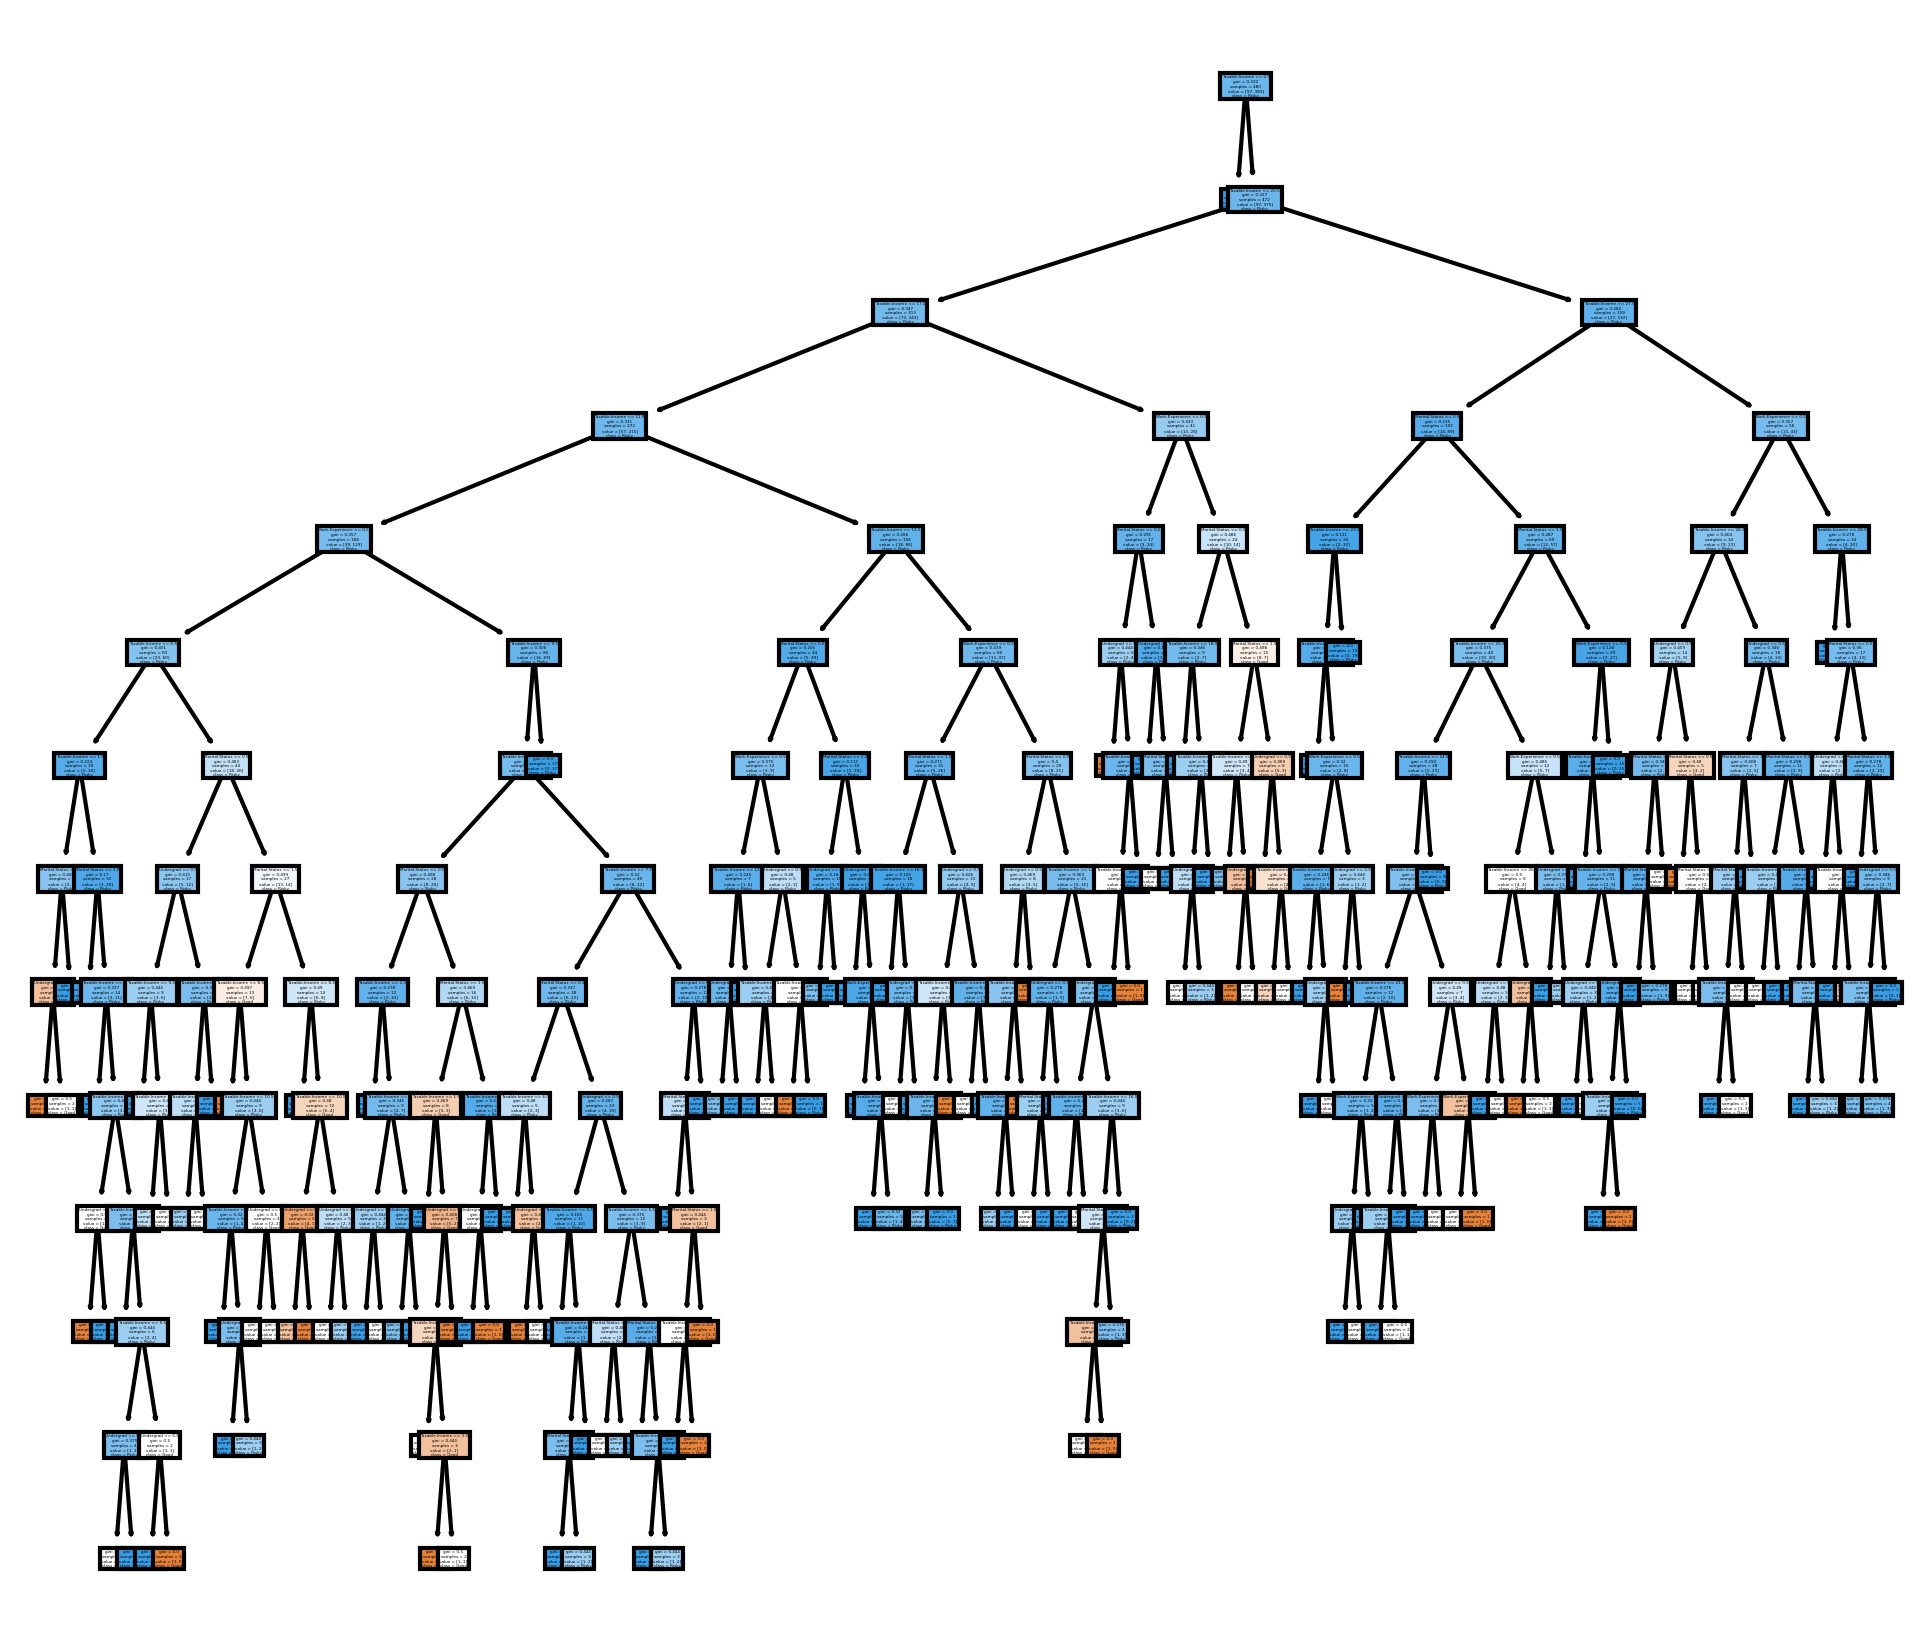

In [39]:
fn=[ 'Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
   'Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [40]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    96
0    24
dtype: int64

In [41]:
pd.Series(y_test).value_counts()

1    93
0    27
Name: Taxable_Income, dtype: int64

In [42]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable_Income,,
0,5,22
1,19,74


In [43]:
np.mean(preds==y_test)

0.6583333333333333

In [44]:
array=Fraud_check.values

In [45]:
X=array[:,0:4]
Y=array[:,4]

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [47]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()

In [48]:
model1.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
model1.score(X_test, Y_test)

-1.1775000000000007